Found 100 images.


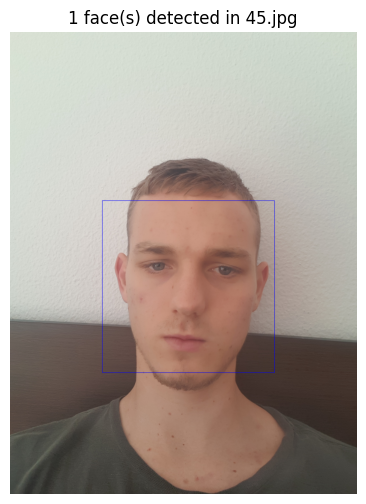

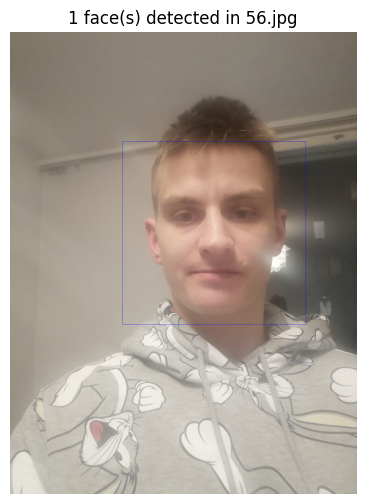

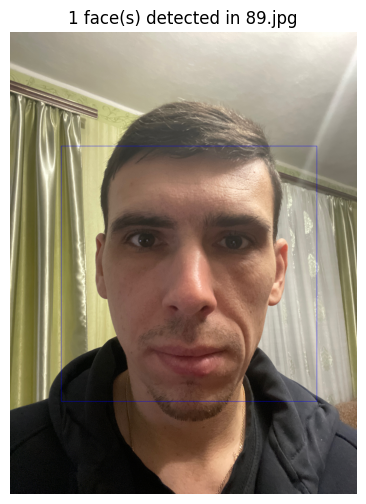

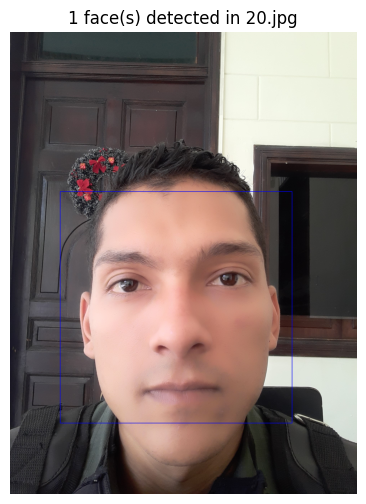

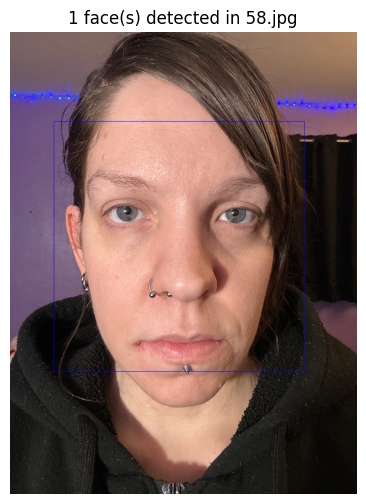

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to your images
image_folder = '/kaggle/input/face-detection-photos-and-labels/images'

# Load the built-in OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Get image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

print(f"Found {len(image_files)} images.")

# Loop through a few images and detect faces
for i, file in enumerate(image_files[:5]):  # just first 5 images
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Could not read {file}")
        continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Show result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{len(faces)} face(s) detected in {file}")
    plt.axis('off')
    plt.show()
